# Hello, KAN!

### Kolmogorov-Arnold representation theorem

Kolmogorov-Arnold representation theorem states that if $f$ is a multivariate continuous function
on a bounded domain, then it can be written as a finite composition of continuous functions of a
single variable and the binary operation of addition. More specifically, for a smooth $f : [0,1]^n \to \mathbb{R}$,


$$f(x) = f(x_1,...,x_n)=\sum_{q=1}^{2n+1}\Phi_q(\sum_{p=1}^n \phi_{q,p}(x_p))$$

where $\phi_{q,p}:[0,1]\to\mathbb{R}$ and $\Phi_q:\mathbb{R}\to\mathbb{R}$. In a sense, they showed that the only true multivariate function is addition, since every other function can be written using univariate functions and sum. However, this 2-Layer width-$(2n+1)$ Kolmogorov-Arnold representation may not be smooth due to its limited expressive power. We augment its expressive power by generalizing it to arbitrary depths and widths.

### Kolmogorov-Arnold Network (KAN)

The Kolmogorov-Arnold representation can be written in matrix form

$$f(x)={\bf \Phi}_{\rm out}\circ{\bf \Phi}_{\rm in}\circ {\bf x}$$

where 

$${\bf \Phi}_{\rm in}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n}(\cdot) \\ \vdots & & \vdots \\ \phi_{2n+1,1}(\cdot) & \cdots & \phi_{2n+1,n}(\cdot) \end{pmatrix},\quad {\bf \Phi}_{\rm out}=\begin{pmatrix} \Phi_1(\cdot) & \cdots & \Phi_{2n+1}(\cdot)\end{pmatrix}$$

We notice that both ${\bf \Phi}_{\rm in}$ and ${\bf \Phi}_{\rm out}$ are special cases of the following function matrix ${\bf \Phi}$ (with $n_{\rm in}$ inputs, and $n_{\rm out}$ outputs), we call a Kolmogorov-Arnold layer:

$${\bf \Phi}= \begin{pmatrix} \phi_{1,1}(\cdot) & \cdots & \phi_{1,n_{\rm in}}(\cdot) \\ \vdots & & \vdots \\ \phi_{n_{\rm out},1}(\cdot) & \cdots & \phi_{n_{\rm out},n_{\rm in}}(\cdot) \end{pmatrix}$$

${\bf \Phi}_{\rm in}$ corresponds to $n_{\rm in}=n, n_{\rm out}=2n+1$, and ${\bf \Phi}_{\rm out}$ corresponds to $n_{\rm in}=2n+1, n_{\rm out}=1$.

After defining the layer, we can construct a Kolmogorov-Arnold network simply by stacking layers! Let's say we have $L$ layers, with the $l^{\rm th}$ layer ${\bf \Phi}_l$ have shape $(n_{l+1}, n_{l})$. Then the whole network is

$${\rm KAN}({\bf x})={\bf \Phi}_{L-1}\circ\cdots \circ{\bf \Phi}_1\circ{\bf \Phi}_0\circ {\bf x}$$

In constrast, a Multi-Layer Perceptron is interleaved by linear layers ${\bf W}_l$ and nonlinearities $\sigma$:

$${\rm MLP}({\bf x})={\bf W}_{L-1}\circ\sigma\circ\cdots\circ {\bf W}_1\circ\sigma\circ {\bf W}_0\circ {\bf x}$$

A KAN can be easily visualized. (1) A KAN is simply stack of KAN layers. (2) Each KAN layer can be visualized as a fully-connected layer, with a 1D function placed on each edge. Let's see an example below.

### Get started with KANs

Initialize KAN

In [105]:
from kan import *

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#device = 'cpu'
print(device)
print(torch.cuda.is_available())
# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[2,5,1], grid=5, k=3, seed=0, device=device)

cuda
True


Create dataset

In [106]:
# create dataset f(x,y) = exp(sin(pi*x)+y^2)
f = lambda x: torch.exp(torch.sin(torch.pi*x[:,[0]]) + x[:,[1]]**2)
dataset = create_dataset(f, n_var=2, device=device)
dataset['train_input'] = dataset['train_input']
dataset['train_label'] = dataset['train_label']

dataset['train_input'].shape, dataset['train_label'].shape

(torch.Size([1000, 2]), torch.Size([1000, 1]))

Plot KAN at initialization

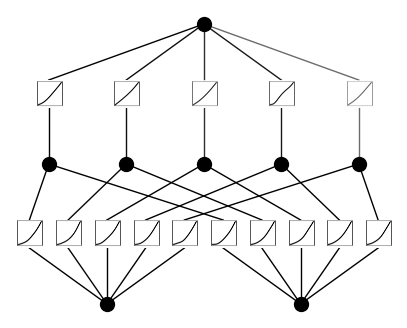

In [107]:
# plot KAN at initialization
model(dataset['train_input'])
model.plot(beta=100)

Train KAN with sparsity regularization

In [108]:
# train the model
model.train(dataset, opt="LBFGS", steps=20, lamb=0.01, lamb_entropy=10., device=device)

train loss: 7.91e-02 | test loss: 8.65e-02 | reg: 1.64e+01 : 100%|██| 20/20 [00:27<00:00,  1.35s/it]


{'train_loss': [array(0.24187298, dtype=float32),
  array(0.1404369, dtype=float32),
  array(0.10911349, dtype=float32),
  array(0.13097852, dtype=float32),
  array(0.13007797, dtype=float32),
  array(0.13752042, dtype=float32),
  array(0.12921447, dtype=float32),
  array(0.11568715, dtype=float32),
  array(0.12466005, dtype=float32),
  array(0.11813539, dtype=float32),
  array(0.11397798, dtype=float32),
  array(0.09729214, dtype=float32),
  array(0.08953536, dtype=float32),
  array(0.08225796, dtype=float32),
  array(0.08082722, dtype=float32),
  array(0.07985476, dtype=float32),
  array(0.07839948, dtype=float32),
  array(0.0765475, dtype=float32),
  array(0.08253271, dtype=float32),
  array(0.07910712, dtype=float32)],
 'test_loss': [array(0.2676679, dtype=float32),
  array(0.1431292, dtype=float32),
  array(0.11430896, dtype=float32),
  array(0.143579, dtype=float32),
  array(0.12516093, dtype=float32),
  array(0.15171236, dtype=float32),
  array(0.13412645, dtype=float32),
  arra

Plot trained KAN

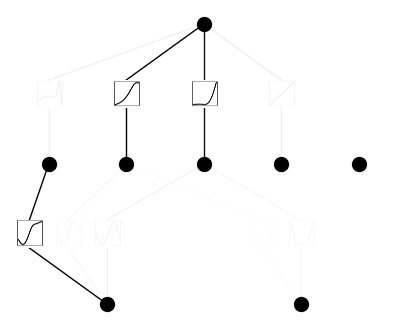

In [109]:
model.plot()

Prune KAN and replot (keep the original shape)

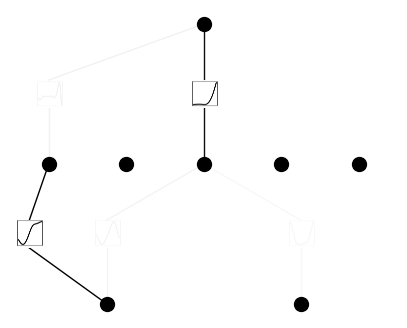

In [110]:
model.prune()
model.plot(mask=True)

Prune KAN and replot (get a smaller shape)

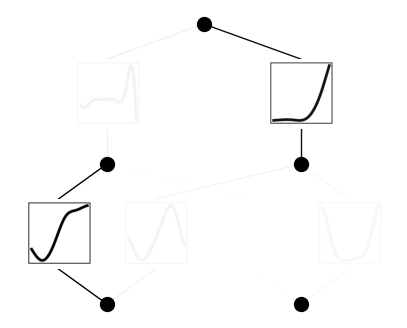

In [111]:
model = model.prune()
model(dataset['train_input'])
model.plot()

Continue training and replot

In [112]:
model.train(dataset, opt="LBFGS", steps=50, device=device)

train loss: 7.47e-03 | test loss: 7.49e-03 | reg: 8.54e+00 : 100%|██| 50/50 [00:41<00:00,  1.20it/s]


{'train_loss': [array(0.13638742, dtype=float32),
  array(0.1067156, dtype=float32),
  array(0.07660142, dtype=float32),
  array(0.06641813, dtype=float32),
  array(0.0566096, dtype=float32),
  array(0.03966045, dtype=float32),
  array(0.03087332, dtype=float32),
  array(0.02847271, dtype=float32),
  array(0.02695991, dtype=float32),
  array(0.02563693, dtype=float32),
  array(0.02428393, dtype=float32),
  array(0.02367505, dtype=float32),
  array(0.02195904, dtype=float32),
  array(0.02102018, dtype=float32),
  array(0.02024361, dtype=float32),
  array(0.01938096, dtype=float32),
  array(0.01888073, dtype=float32),
  array(0.0177558, dtype=float32),
  array(0.0168739, dtype=float32),
  array(0.01645646, dtype=float32),
  array(0.01598549, dtype=float32),
  array(0.01530214, dtype=float32),
  array(0.01456222, dtype=float32),
  array(0.01340496, dtype=float32),
  array(0.01302117, dtype=float32),
  array(0.0125017, dtype=float32),
  array(0.01211941, dtype=float32),
  array(0.01192305,

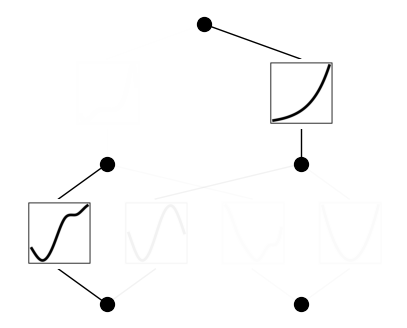

In [113]:
model.plot()

Automatically or manually set activation functions to be symbolic

In [114]:
mode = 'otro' #"manual" # "auto"

if mode == "manual":
    # manual mode
    model.fix_symbolic(0,0,0,'sin');
    model.fix_symbolic(0,1,0,'x^2');
    model.fix_symbolic(1,0,0,'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x','x^2','x^3','x^4','exp', 'log','sqrt','tanh','sin','abs']
    model.auto_symbolic(lib=lib)
else:
    lib = ['sin', 'x^2', 'exp']
    model.auto_symbolic(lib=lib)    

fixing (0,0,0) with sin, r2=0.9721867442131042
fixing (0,0,1) with sin, r2=0.9999642968177795
fixing (0,1,0) with sin, r2=0.9710376858711243
fixing (0,1,1) with x^2, r2=0.9999935030937195
fixing (1,0,0) with exp, r2=0.9324169754981995
fixing (1,1,0) with x^2, r2=0.9916593432426453


In [115]:
model.train(dataset, opt="LBFGS", steps=50, device=device)

train loss: 1.14e-01 | test loss: 1.12e-01 | reg: 8.74e+00 : 100%|██| 50/50 [00:14<00:00,  3.45it/s]


{'train_loss': [array(0.1157656, dtype=float32),
  array(0.11475889, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.11442929, dtype=float32),
  array(0.1144293, dtype=float32),
  array(0.11442929, dtype=float32),
  array(0.11417629, dtype=float32),
  array(0.11405138, dtype=float32),
  array(0.11405133, dtype=float32),
  array(0.11405133, dtype=float32),
  array(0.11388945, dtype=float32),
  array(0.11388028, dtype=float32),
  array(0.11388028, dtype=float32),
  array(0.11388028, dtype=float32),
  array(0.11388028, dtype=floa

Continue training to almost machine precision

Obtain the symbolic formula

In [116]:
model.symbolic_formula()[0][0]

0.99*(-x_2**2 - 0.88*sin(3.19*x_1) - 0.59)**2 + 0.03*exp(1.51*sin(2.3*x_1) + 0.02*sin(1.0*x_2 - 8.04)) + 0.49